# PREP

In [117]:
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

solar_prod_raw = pd.read_csv('../raw/solararray_production.csv')
solar_weather_raw = pd.read_csv('../raw/solararray_weather.csv')


In [118]:
solar_prod_raw['hour_string'] = solar_prod_raw['Hour'].apply(str)
solar_prod_raw['hour_formatted'] = solar_prod_raw.apply(lambda x: np.where(len(x['hour_string'])==2, 
                                                                 x['hour_string'], 
                                                                 '0'+x['hour_string']), axis=1)
solar_prod_raw['datestring'] = solar_prod_raw.apply(lambda x: str(x['Date'])+' '+str(x['hour_formatted'])+str(':00:00'), axis=1)
solar_prod_raw['datetime'] = pd.to_datetime(solar_prod_raw['datestring'], infer_datetime_format=True)
solar_prod_raw = solar_prod_raw.set_index('datetime')
solar_prod_raw.drop(['Date', 'Hour', 'hour_formatted', 'datestring', 'hour_string'], axis=1, inplace=True)

In [119]:
solar_prod_raw.head()
start_time = '01-04-2010 16:00:00'

In [120]:
solar_prod_raw.tail()
end_time = '08-31-2014 20:00:00'

In [121]:
solar_weather_raw.head()

,Location,Year,Month,Day,Hour,Cloud_Cover_Fraction,Dew_Point,Humidity_Fraction,Precipitation,Pressure,Temperature,Visibility,Wind_Speed
0,Solar Array,2010,1,1,0,1.0,-8.9,0.8050,0.0,991.2,-6.1,9.656,6.7
1,Solar Array,2010,1,1,1,1.0,-8.3,0.8437,0.0,990.9,-6.1,6.437,5.1
2,Solar Array,2010,1,1,2,1.0,-7.8,0.8443,0.0,990.9,-5.6,9.656,5.1
3,Solar Array,2010,1,1,3,1.0,-7.8,0.8066,0.0,991.6,-5.0,16.093,5.1
4,Solar Array,2010,1,1,4,1.0,-7.8,0.8066,0.0,991.9,-5.0,16.093,4.1


In [122]:
solar_weather_raw['hour_str'] = solar_weather_raw.apply(lambda x: np.where(len(str(x['Hour']))==2, 
                                                                           str(x['Hour']),
                                                                           '0'+str(x['Hour'])), axis=1)
solar_weather_raw['datestring'] = solar_weather_raw.apply(lambda x: str(x['Year'])+'-'+str(x['Month'])+'-'+str(x['Day'])+' '+str(x['hour_str'])+str(':00:00'), axis=1)

solar_weather_raw['datetime'] = pd.to_datetime(solar_weather_raw['datestring'], infer_datetime_format=True)
solar_weather_raw = solar_weather_raw.set_index('datetime')
solar_weather_raw.drop(['Location','Year','Month','Day','Hour', 'hour_str', 'datestring'],axis=1, inplace=True)
solar_weather_raw.head()


,Cloud_Cover_Fraction,Dew_Point,Humidity_Fraction,Precipitation,Pressure,Temperature,Visibility,Wind_Speed
datetime,,,,,,,,
2010-01-01 00:00:00,1.0,-8.9,0.8050,0.0,991.2,-6.1,9.656,6.7
2010-01-01 01:00:00,1.0,-8.3,0.8437,0.0,990.9,-6.1,6.437,5.1
2010-01-01 02:00:00,1.0,-7.8,0.8443,0.0,990.9,-5.6,9.656,5.1
2010-01-01 03:00:00,1.0,-7.8,0.8066,0.0,991.6,-5.0,16.093,5.1
2010-01-01 04:00:00,1.0,-7.8,0.8066,0.0,991.9,-5.0,16.093,4.1


In [123]:
solar_angle_raw = pd.read_csv('../raw/solararray_solarangle.csv')
solar_angle_raw['Hour'] = solar_angle_raw['Hour']-1
solar_angle_raw['hour_str'] = solar_angle_raw.apply(lambda x: np.where(len(str(x['Hour']))==2, 
                                                                       str(x['Hour']),
                                                                       '0'+str(x['Hour'])), axis=1)
solar_angle_raw['datestring'] = solar_angle_raw.apply(lambda x: str(x['Year'])+'-'+str(x['Month'])+'-'+str(x['Day'])+' '+str(x['hour_str'])+str(':00:00'), axis=1)

solar_angle_raw['datetime'] = pd.to_datetime(solar_angle_raw['datestring'], infer_datetime_format=True)
solar_angle_raw = solar_angle_raw.set_index('datetime')
solar_angle_raw.drop(['Location','Year','Month','Day','Hour', 'hour_str', 'datestring'],axis=1, inplace=True)
solar_angle_raw.head()

,Solar_Elevation
datetime,
2010-01-04 00:00:00,-67.403458
2010-01-04 01:00:00,-68.776338
2010-01-04 02:00:00,-63.608614
2010-01-04 03:00:00,-54.737803
2010-01-04 04:00:00,-44.409897


In [139]:
# subset based on start and end
solar_weather_raw = solar_weather_raw['01-04-2010 16:00:00':'08-31-2014 20:00:00']
solar_angle_raw = solar_angle_raw['01-04-2010 16:00:00':'08-31-2014 20:00:00']
solar_df = solar_weather_raw.join(solar_prod_raw)
solar_df = solar_df.join(solar_angle_raw)
solar_df.head(150)

,Cloud_Cover_Fraction,Dew_Point,Humidity_Fraction,Precipitation,Pressure,Temperature,Visibility,Wind_Speed,Electricity_KW_HR,Solar_Elevation
datetime,,,,,,,,,,
2010-01-04 16:00:00,1.0,-8.3,0.6827,0.0,992.2,-3.3,16.093,3.6,14186.16,9.690929
2010-01-04 16:00:00,1.0,-8.3,0.6827,0.0,992.2,-3.3,16.093,3.6,14186.16,9.690929
2010-01-04 17:00:00,1.0,-8.3,0.7141,0.0,992.6,-3.9,16.093,3.1,5898.00,1.272626
2010-01-04 17:00:00,1.0,-8.3,0.7141,0.0,992.6,-3.9,16.093,3.1,5898.00,1.272626
2010-01-04 18:00:00,1.0,-8.3,0.7414,0.0,992.6,-4.4,16.093,3.1,NaN,-8.252365
2010-01-04 18:00:00,1.0,-8.3,0.7414,0.0,992.6,-4.4,16.093,3.1,NaN,-8.252365
2010-01-04 19:00:00,1.0,-8.3,0.7414,0.0,992.9,-4.4,16.093,2.6,NaN,-18.518180
2010-01-04 19:00:00,1.0,-8.3,0.7414,0.0,992.9,-4.4,16.093,2.6,NaN,-18.518180
2010-01-04 20:00:00,1.0,-8.9,0.7403,0.0,993.2,-5.0,16.093,2.6,NaN,-29.218920


In [140]:
solar_df.shape

(50789, 10)

In [141]:
solar_df['Electricity_KW_HR'].fillna(0, inplace=True)
solar_df = solar_df[~solar_df.index.duplicated(keep='first')]
solar_df.shape

(40805, 10)

In [142]:
# add t-1 and t-2
solar_df['KW_t-1'] = solar_df['Electricity_KW_HR'].shift(1)

solar_df['KW_t-1'].fillna(0, inplace=True)

solar_df['KW_t-2'] = solar_df['Electricity_KW_HR'].shift(2)
solar_df['KW_t-2'].fillna(0, inplace=True)

solar_df['KW_t-3'] = solar_df['Electricity_KW_HR'].shift(3)
solar_df['KW_t-3'].fillna(0, inplace=True)
solar_df.head()

,Cloud_Cover_Fraction,Dew_Point,Humidity_Fraction,Precipitation,Pressure,Temperature,Visibility,Wind_Speed,Electricity_KW_HR,Solar_Elevation,KW_t-1,KW_t-2,KW_t-3
datetime,,,,,,,,,,,,,
2010-01-04 16:00:00,1.0,-8.3,0.6827,0.0,992.2,-3.3,16.093,3.6,14186.16,9.690929,0.00,0.00,0.00
2010-01-04 17:00:00,1.0,-8.3,0.7141,0.0,992.6,-3.9,16.093,3.1,5898.00,1.272626,14186.16,0.00,0.00
2010-01-04 18:00:00,1.0,-8.3,0.7414,0.0,992.6,-4.4,16.093,3.1,0.00,-8.252365,5898.00,14186.16,0.00
2010-01-04 19:00:00,1.0,-8.3,0.7414,0.0,992.9,-4.4,16.093,2.6,0.00,-18.518180,0.00,5898.00,14186.16
2010-01-04 20:00:00,1.0,-8.9,0.7403,0.0,993.2,-5.0,16.093,2.6,0.00,-29.218920,0.00,0.00,5898.00


In [143]:
solar_df.shape

(40805, 13)

In [144]:
solar_df_rmna = solar_df.dropna(how='any')
solar_df_rmna.shape

(25615, 13)

In [145]:
solar_df_rmna['Month'] = solar_df_rmna.index.to_series().apply(lambda x: x.strftime('%m'))
solar_df_rmna['Hour'] = solar_df_rmna.index.to_series().apply(lambda x: x.strftime('%H'))
solar_df_rmna = solar_df_rmna[~solar_df_rmna.index.duplicated(keep='first')]
solar_df_rmna.head()

/Users/johnmatune/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/johnmatune/anaconda/lib/python3.6/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


,Cloud_Cover_Fraction,Dew_Point,Humidity_Fraction,Precipitation,Pressure,Temperature,Visibility,Wind_Speed,Electricity_KW_HR,Solar_Elevation,KW_t-1,KW_t-2,KW_t-3,Month,Hour
datetime,,,,,,,,,,,,,,,
2010-01-04 16:00:00,1.0,-8.3,0.6827,0.0,992.2,-3.3,16.093,3.6,14186.16,9.690929,0.00,0.00,0.00,01,16
2010-01-04 17:00:00,1.0,-8.3,0.7141,0.0,992.6,-3.9,16.093,3.1,5898.00,1.272626,14186.16,0.00,0.00,01,17
2010-01-04 18:00:00,1.0,-8.3,0.7414,0.0,992.6,-4.4,16.093,3.1,0.00,-8.252365,5898.00,14186.16,0.00,01,18
2010-01-04 19:00:00,1.0,-8.3,0.7414,0.0,992.9,-4.4,16.093,2.6,0.00,-18.518180,0.00,5898.00,14186.16,01,19
2010-01-04 20:00:00,1.0,-8.9,0.7403,0.0,993.2,-5.0,16.093,2.6,0.00,-29.218920,0.00,0.00,5898.00,01,20


# MODEL BUILDING

In [166]:
from sklearn.ensemble import GradientBoostingRegressor, AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV


In [147]:
# get dummy variables for model ready set
mod_df = pd.get_dummies(solar_df_rmna)
mod_df.head()

,Cloud_Cover_Fraction,Dew_Point,Humidity_Fraction,Precipitation,Pressure,Temperature,Visibility,Wind_Speed,Electricity_KW_HR,Solar_Elevation,...,Hour_14,Hour_15,Hour_16,Hour_17,Hour_18,Hour_19,Hour_20,Hour_21,Hour_22,Hour_23
datetime,,,,,,,,,,,,,,,,,,,,,
2010-01-04 16:00:00,1.0,-8.3,0.6827,0.0,992.2,-3.3,16.093,3.6,14186.16,9.690929,...,0,0,1,0,0,0,0,0,0,0
2010-01-04 17:00:00,1.0,-8.3,0.7141,0.0,992.6,-3.9,16.093,3.1,5898.00,1.272626,...,0,0,0,1,0,0,0,0,0,0
2010-01-04 18:00:00,1.0,-8.3,0.7414,0.0,992.6,-4.4,16.093,3.1,0.00,-8.252365,...,0,0,0,0,1,0,0,0,0,0
2010-01-04 19:00:00,1.0,-8.3,0.7414,0.0,992.9,-4.4,16.093,2.6,0.00,-18.518180,...,0,0,0,0,0,1,0,0,0,0
2010-01-04 20:00:00,1.0,-8.9,0.7403,0.0,993.2,-5.0,16.093,2.6,0.00,-29.218920,...,0,0,0,0,0,0,1,0,0,0


In [148]:
y = mod_df['Electricity_KW_HR']
X = mod_df.drop('Electricity_KW_HR', axis=1)

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=10, test_size=0.2)

## GBM

In [167]:
gbm = GradientBoostingRegressor()

In [169]:
param_grid = {"max_depth": [4, 10, 14, 20],
              "n_estimators": [50, 150, 200],
              "max_features": [0.15, 0.75],
             "min_samples_leaf": [0.05, 0.15]}

grid_search_gbm = GridSearchCV(gbm, 
                               param_grid=param_grid, 
                               cv=5)

In [170]:
# this takes a while to run
solar_gbm = grid_search_gbm.fit(X, y)
rmse_gbm = np.sqrt(mean_squared_error(y, solar_gbm.predict(X)))


Best Params: {'cv': 5, 'error_score': 'raise-deprecating', 'estimator__alpha': 0.9, 'estimator__criterion': 'friedman_mse', 'estimator__init': None, 'estimator__learning_rate': 0.1, 'estimator__loss': 'ls', 'estimator__max_depth': 3, 'estimator__max_features': None, 'estimator__max_leaf_nodes': None, 'estimator__min_impurity_decrease': 0.0, 'estimator__min_impurity_split': None, 'estimator__min_samples_leaf': 1, 'estimator__min_samples_split': 2, 'estimator__min_weight_fraction_leaf': 0.0, 'estimator__n_estimators': 100, 'estimator__n_iter_no_change': None, 'estimator__presort': 'auto', 'estimator__random_state': None, 'estimator__subsample': 1.0, 'estimator__tol': 0.0001, 'estimator__validation_fraction': 0.1, 'estimator__verbose': 0, 'estimator__warm_start': False, 'estimator': GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,

In [183]:
print(f'RMSE: {rmse_gbm:.0f}')

RMSE: 11645


In [180]:
solar_gbm.best_params_

{'max_depth': 14,
 'max_features': 0.75,
 'min_samples_leaf': 0.05,
 'n_estimators': 200}

In [187]:
best_gbm = GradientBoostingRegressor(max_depth= 14,
 max_features= 0.75,
 min_samples_leaf= 0.05,
 n_estimators= 200).fit(X, y)

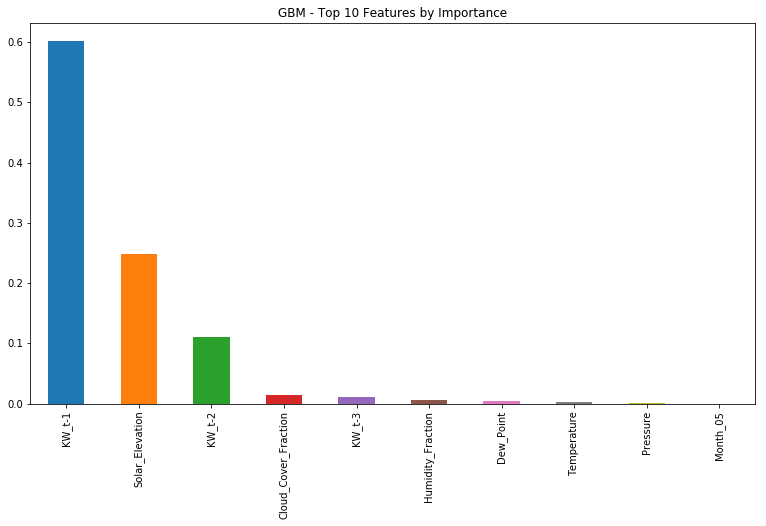

In [200]:
important_features = pd.Series(data=best_gbm.feature_importances_,index=X.columns)
important_features.sort_values(ascending=False,inplace=True)
important_features[:10].plot(kind='bar', figsize=(13,7), title='GBM - Top 10 Features by Importance')

## AdaBoost

In [178]:
ada = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(max_depth=8),
                       n_estimators=200)

In [179]:
solar_ada = ada.fit(X_train, y_train)
train_rmse_ada = np.sqrt(mean_squared_error(y_train, solar_ada.predict(X_train)))
test_rmse_ada = np.sqrt(mean_squared_error(y_test, solar_ada.predict(X_test)))

print(f'Train RMSE: {train_rmse_ada:.2f}')
print(f'Test RMSE: {test_rmse_ada:.2f}')

Train RMSE: 11029.66
Test RMSE: 14344.02


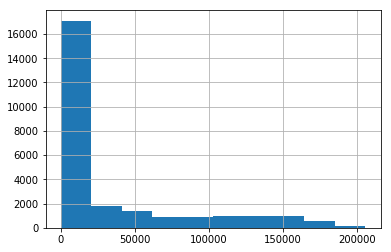

In [177]:
mod_df['Electricity_KW_HR'].hist()